# This is a simple example of a reaction-diffusion model 
This model uses 2 different morphogens, an activator which activates itself and an inhibitor, and an inhbitor which inhibits the activator.  

## Building the Domain
Our physical domain is a discreteized 1-dimensional field that can be represented by a series of 2-dimensional vectors.  We will use a length of 100 and a discretization distance of 1. 

In [1]:
import numpy as np

length =100
dx=1.0

# Update Equations

The next thing that we need to define is the update equations for our simulation. The first equation is the approximation of the 2nd derivative The inputs to this are the 3 spatial values that we need to approximate the 2nd derivative.

In [2]:
def second_deriv_approx(U,delta_x):
    return (U[2]+U[0]-2*U[1])/delta_x**2

The next equation is the equation that describes how the activator is affected by the inhibitor and itself. $R_a$ is the reaction rate, $A$ is the activator concentration and $I$ is the inhibitor concentration.

In [3]:
def activator_f(A,I,R_A):
    return R_A-A+A**2*I

Next we have the equation for the inhibitor. 

In [4]:
def inhibitor_g(A,I,R_I):
    return R_I-A**2*I

These can then be used in a typical activator-inhibitor function which includes the diffusion coefficients $D_A$ and $D_I$

In [5]:
def update_A(A,I,R_A,D_A,dx):
    return D_A*second_deriv_approx(A,dx)+activator_f(A[1],I[1],R_A)

def update_I(A,I,R_I,D_I,dx):
    return D_I*second_deriv_approx(I,dx)+inhibitor_g(A[1],I[1],R_I)

# Integration Method

<Update to something better than Euler's Method>

In [6]:
def integrate(U,du,dt):
    return U+du*dt

# Simulation

First we populate the domain with random values

Next we set the parameter values for the simulation, including number of iterations

In [7]:
iterations = 100
dt = 0.1
R_A = np.random.uniform(0,2)
D_A = np.random.uniform(0,2)
R_I = np.random.uniform(0,2)
D_I = np.random.uniform(0,2)

Then we populate the initial random fields

In [8]:
A_domain = np.random.rand(length)
I_domain = np.random.rand(length)

Then we simply step through the time and upate our concentrations

In [9]:
for i in range(iterations):
    new_A = []
    new_I = []
    
    # update values
    for x in range(1,length-1):
        A = [A_domain[x-1],A_domain[x],A_domain[x+1]]
        I = [I_domain[x-1],I_domain[x],I_domain[x+1]]
        
        dA = update_A(A,I,R_A,D_A,dx)
        dI = update_I(A,I,R_I,D_I,dx)
        
        new_A.append(integrate(A_domain[x],dA,dt))
        new_I.append(integrate(I_domain[x],dI,dt))
        
    A_domain[1:-1] = new_A
    I_domain[1:-1] = new_I

Finally we run the simulation and view the result

Text(0.5, 1.0, 'R_A:0.8469858242087143 R_I:0.5055007644917984 D_A:0.5235940482517556 D_I:1.140769208565589')

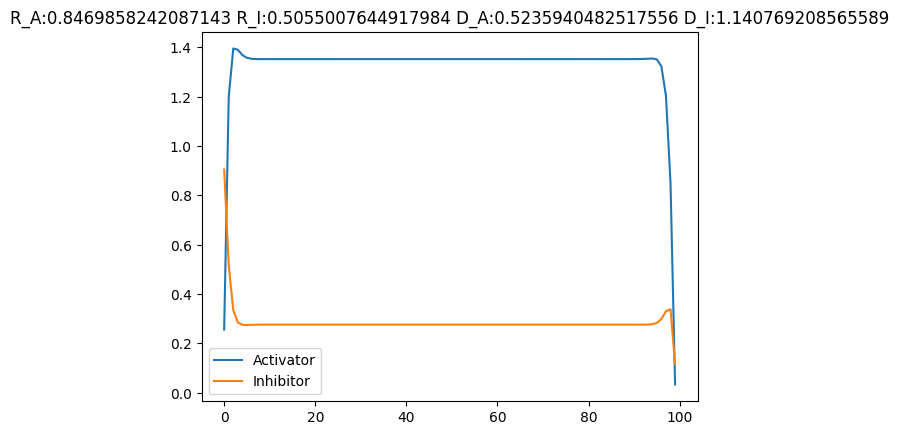

In [10]:
import matplotlib.pyplot as plt

plt.plot(A_domain)
plt.plot(I_domain)
plt.legend(["Activator","Inhibitor"])
plt.title(f"R_A:{R_A} R_I:{R_I} D_A:{D_A} D_I:{D_I}")

By rolling this all up into a single method we can quickly create different simulations with different parameters.

In [11]:
def simulate(fig_name):
    iterations = 100
    dt = 0.1
    R_A = np.random.uniform(0,2)
    D_A = np.random.uniform(0,2)
    R_I = np.random.uniform(0,2)
    D_I = np.random.uniform(0,2)
    
    A_domain = np.random.rand(length)
    I_domain = np.random.rand(length)
    
    for i in range(iterations):
        new_A = []
        new_I = []
    
        # update values
        for x in range(1,length-1):
            A = [A_domain[x-1],A_domain[x],A_domain[x+1]]
            I = [I_domain[x-1],I_domain[x],I_domain[x+1]]
        
            dA = update_A(A,I,R_A,D_A,dx)
            dI = update_I(A,I,R_I,D_I,dx)
        
            new_A.append(integrate(A_domain[x],dA,dt))
            new_I.append(integrate(I_domain[x],dI,dt))
        
        A_domain[1:-1] = new_A
        I_domain[1:-1] = new_I
    
    plt.clf()
    plt.plot(A_domain)
    plt.plot(I_domain)
    plt.legend(["Activator","Inhibitor"])
    plt.title(f"R_A:{R_A:.2f} R_I:{R_I:.2f} D_A:{D_A:.2f} D_I:{D_I:.2f}")
    plt.savefig(f"{fig_name}.png")

/var/folders/gk/crmfzhhn4xxgmdj8n65gvh2r0000gn/T/ipykernel_70088/51937400.py:2: RuntimeWarning: overflow encountered in scalar power
  return R_A-A+A**2*I
/var/folders/gk/crmfzhhn4xxgmdj8n65gvh2r0000gn/T/ipykernel_70088/2159554106.py:2: RuntimeWarning: invalid value encountered in scalar add
  return U+du*dt
/var/folders/gk/crmfzhhn4xxgmdj8n65gvh2r0000gn/T/ipykernel_70088/51937400.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return R_A-A+A**2*I
/var/folders/gk/crmfzhhn4xxgmdj8n65gvh2r0000gn/T/ipykernel_70088/4257124066.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return (U[2]+U[0]-2*U[1])/delta_x**2
/var/folders/gk/crmfzhhn4xxgmdj8n65gvh2r0000gn/T/ipykernel_70088/1768643740.py:5: RuntimeWarning: invalid value encountered in scalar add
  return D_I*second_deriv_approx(I,dx)+inhibitor_g(A[1],I[1],R_I)


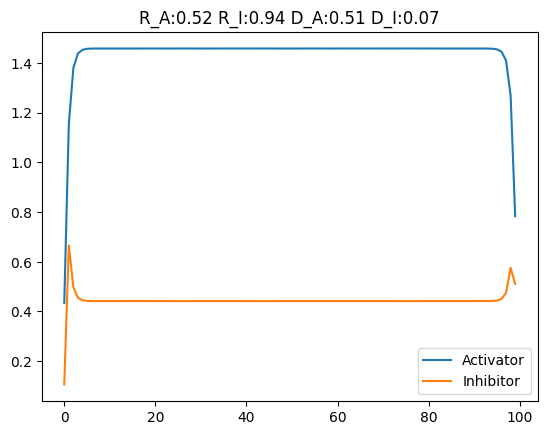

In [12]:
for i in range(100):
    simulate(i)